In [1]:
from dcel import DCEL, Vertex, hEdge, Face
from hull3D import ConvexHull3D, preprocess, colinear
import numpy as np
from scipy import spatial


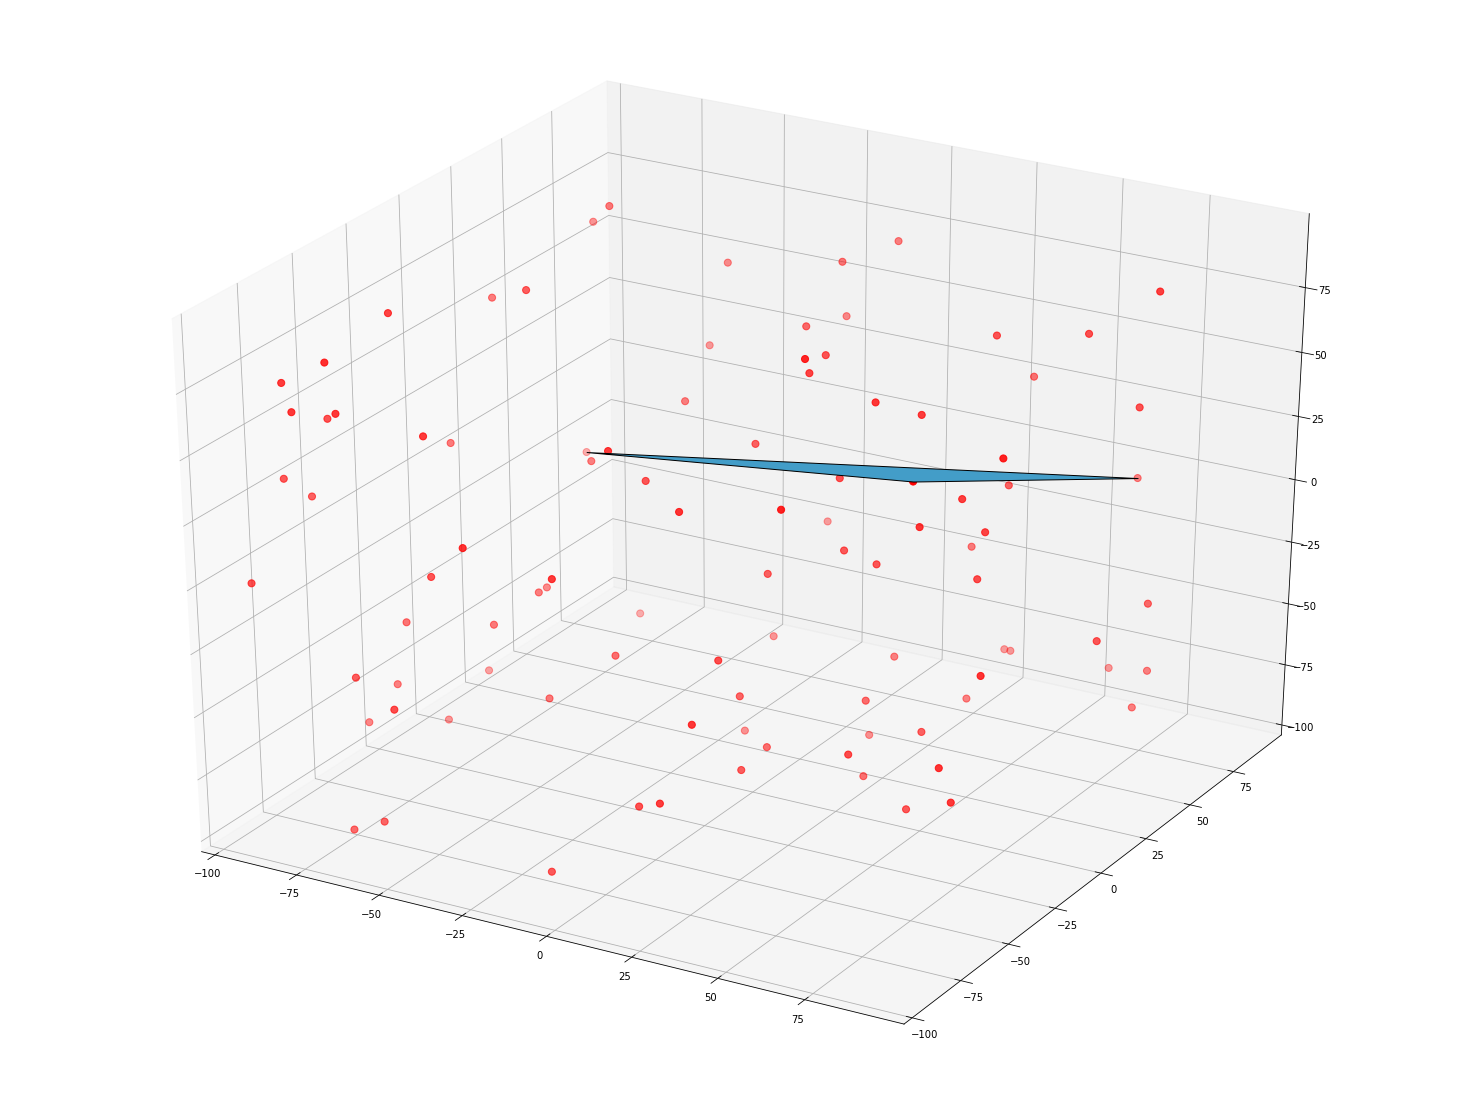

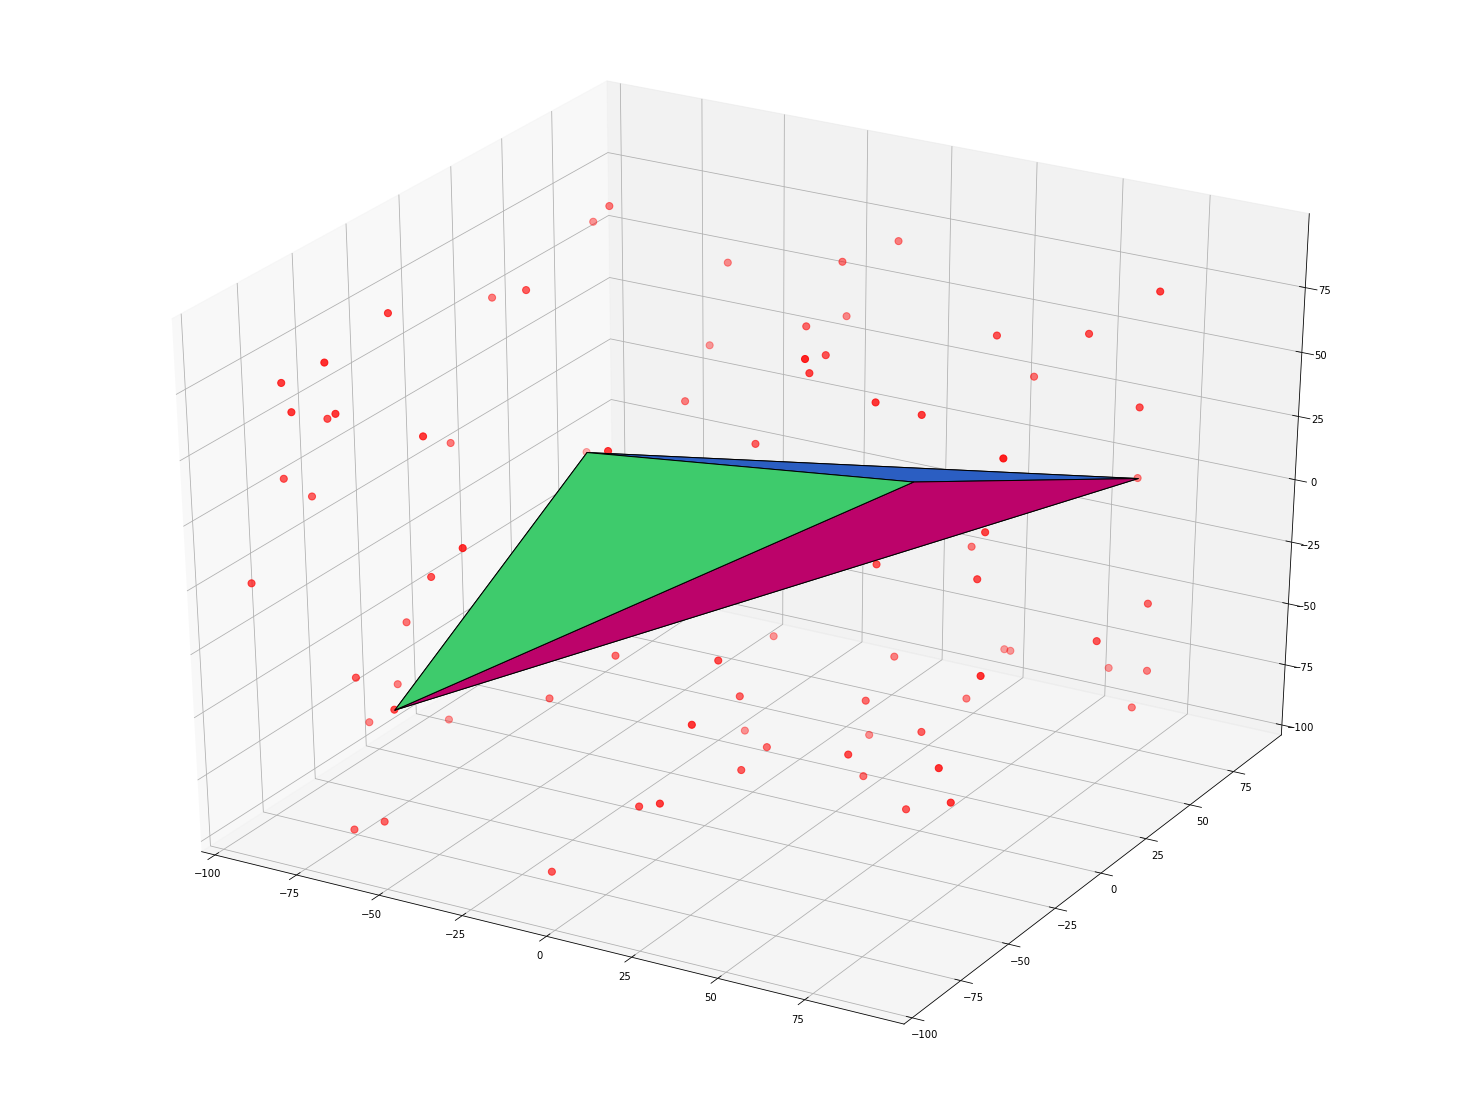

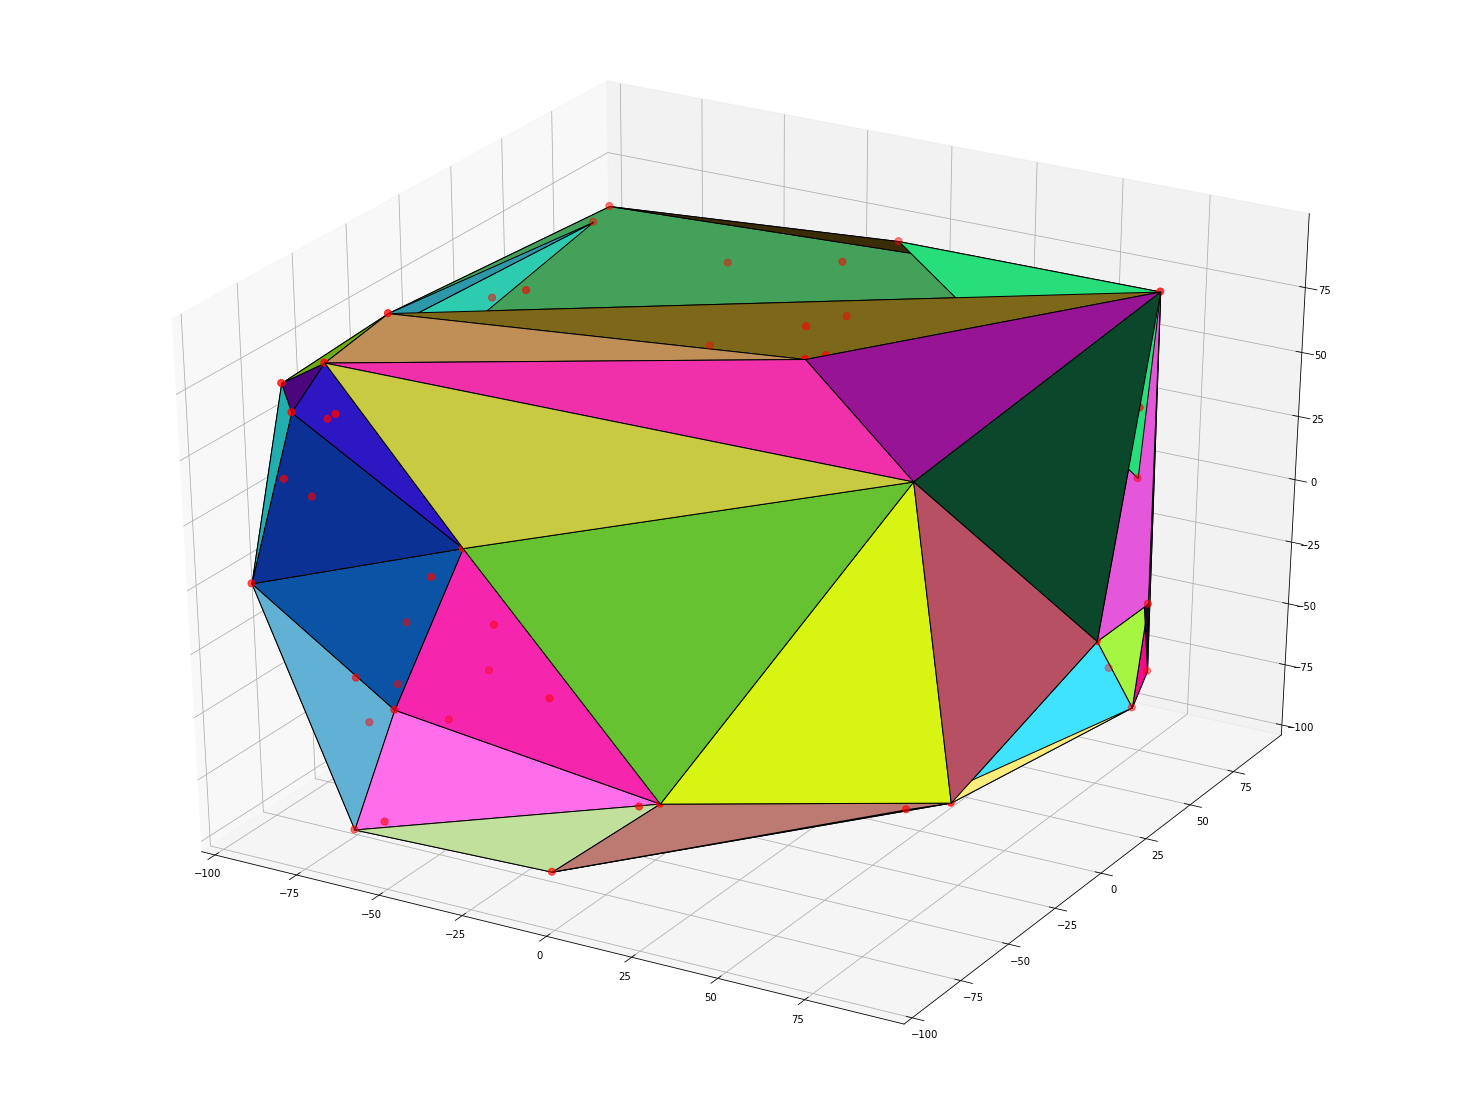

Vertices in hull:  33
Vertices according to scipy:  33
My Hull is superset of QHULL:  True


In [12]:
pts = np.random.randint(-100,100, (100,3))
    
hull = ConvexHull3D(pts=pts, make_frames=True)
hull.generateImage()
print("Vertices in hull: ", len(hull.getVertexIndices()))

pts = hull.getPts()
scipy_hull = spatial.ConvexHull(pts)
print("Vertices according to scipy: ", len(scipy_hull.vertices))

mine = set(hull.getVertexIndices())
qhull = set(scipy_hull.vertices)
print("My Hull is superset of QHULL: ", mine.issuperset(qhull))

In [3]:
np.array(hull.getVertexIndices())

array([ 0,  1,  2,  3,  4,  5, 12, 13, 18, 24, 29, 30, 32, 33, 34, 35, 44,
       45, 47, 49, 50, 51, 52, 57, 58, 59, 62, 69, 70, 72, 74, 76, 83, 87,
       96])

In [4]:
scipy_hull.vertices

array([ 0,  1,  2,  3,  4,  5, 12, 13, 18, 24, 29, 30, 32, 33, 34, 35, 44,
       45, 47, 51, 52, 57, 58, 59, 62, 69, 70, 72, 74, 76, 83, 87, 96], dtype=int32)

In [5]:
me = set(hull.getVertexIndices())
qhull = set(scipy_hull.vertices)

In [6]:
me.issuperset(qhull)

True